# Comparing Molecules: Identical, Diastereomers, Enantiomers?  #

In [1]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw

from stereomolgraph import StereoMolGraph
from stereomolgraph.ipython import View2D

from stereomolgraph.experimental import Graph2JSON

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

View2D.show_atom_numbers = True
View2D.show_h = True
View2D.generate_bond_orders = False
View2D.height = 200
View2D.width = 500

[10:49:37] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)



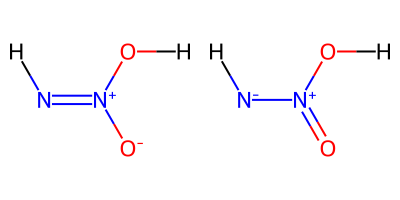

In [29]:
inchi = "InChI=1S/H2N2O2/c1-2(3)4/h1,3H"

rdmol1 = Chem.AddHs(Chem.MolFromInchi(inchi), explicitOnly=False)
Draw.MolsToImage(list(Chem.ResonanceMolSupplier(rdmol1)))

rdmol2 = list(Chem.ResonanceMolSupplier(rdmol1))[0]


Aromatic Bond Stereo


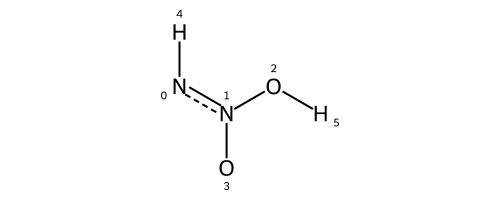

In [30]:
smg0 = StereoMolGraph.from_rdmol(rdmol2)
smg0

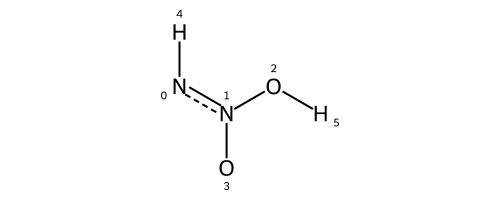

mappingproxy({frozenset({0, 1}): PlanarBond((4, None, 0, 1, 2, 3), 0)})

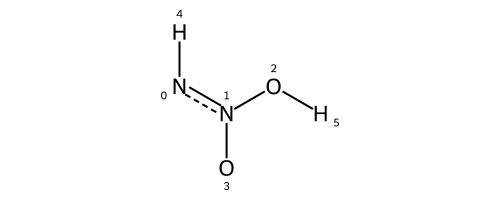

mappingproxy({frozenset({0, 1}): PlanarBond((4, None, 0, 1, 3, 2), 0)})

In [31]:
from stereomolgraph import experimental

smgs = list(experimental.generate_stereoisomers(smg0))
for smg in smgs:
    smg
    smg.bond_stereo

In [32]:
json_str = Graph2JSON.to_json_str(smg0)
json_str

'{"StereoMolGraph": {"Atoms": [[0, "N"], [1, "N"], [2, "O"], [3, "O"], [4, "H"], [5, "H"]], "Bonds": [[0, 1], [0, 4], [1, 2], [1, 3], [2, 5]], "AtomStereo": [], "BondStereo": [["PlanarBond", [4, null, 0, 1, 2, 3], null]]}}'

mappingproxy({frozenset({0, 1}): PlanarBond([4, None, 0, 1, 2, 3], None)})

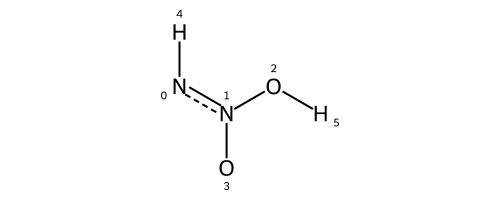

In [33]:
loaded_graph = Graph2JSON.from_json_str(json_str)
loaded_graph.bond_stereo
loaded_graph